In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)  # Pandas verzió
print(np.__version__)  # Numpy verzió

2.3.3
1.26.0


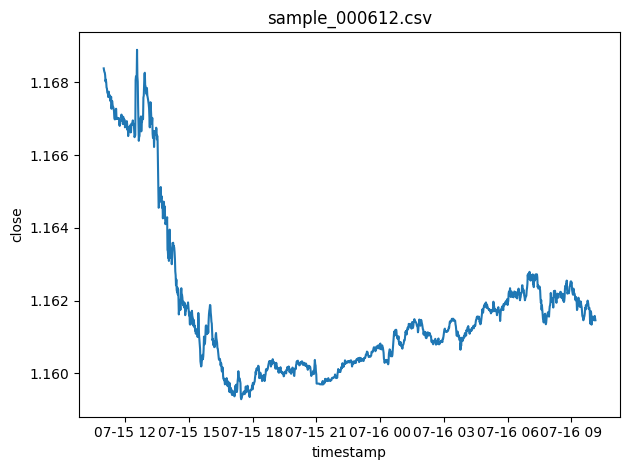

In [5]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


def plot_close(csv_path: str | Path, title: str | None = None) -> None:
    """
    Reads a sample CSV and plots the Close price.
    Expects columns like: timestamp, open, high, low, close, target (target optional).
    """
    csv_path = Path(csv_path)
    df = pd.read_csv(csv_path)

    # normalize column names
    df.columns = [c.strip().lower() for c in df.columns]

    if "close" not in df.columns:
        raise ValueError(f"No 'close' column found in {csv_path}. Columns: {df.columns.tolist()}")

    # x-axis: timestamp if exists, else row index
    if "timestamp" in df.columns:
        # works for 'YYYY-MM-DD HH:MM' and many other formats
        x = pd.to_datetime(df["timestamp"], errors="coerce")
        # if parsing fails badly, fall back to index
        if x.isna().mean() > 0.5:
            x = df.index
            xlabel = "index"
        else:
            xlabel = "timestamp"
    else:
        x = df.index
        xlabel = "index"

    y = df["close"].astype(float)

    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel("close")
    plt.title(title if title else csv_path.name)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_close("C:/Users/Bori/deep_learning_project/output/dataset/segments/sample_000612.csv")
